In [1]:
import sys
sys.path.append('../')

import numpy as np
import pandas as pd
import tempfile
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

import logging
logging.getLogger().setLevel(logging.INFO)

from banditpylib import trials_to_dataframe
from banditpylib.arms import GaussianArm
from banditpylib.bandits import MultiArmedBandit
from banditpylib.protocols import SinglePlayerProtocol
from banditpylib.learners.mab_fcbai_learner import ExpGap, LilUCBHeuristic, TrackAndStop
from banditpylib.utils import argmax_or_min_tuple, argmax_or_min, argmax_or_min_tuple_second

In [2]:
confidence = 0.95
#means =  [0.7, 0.4, 0.1]
#means = [0.5, 0.45, 0.43, 0.4] #w∗(µ1) = [0.417 0.390 0.136 0.057]
means =  [0.6, 0.51, 0.5, 0.49, 0.48] #w∗(µ2) = [0.336, 0.251, 0.177, 0.132, 0.104]
#means =  [0.3, 0.21, 0.2, 0.19, 0.18] #w∗(µ2) = [0.336, 0.251, 0.177, 0.132, 0.104]
max_pulls=22000
forced_exp_pulls=100
std=1

arms = [GaussianArm(mu=mean, std=std) for mean in means]
bandit = MultiArmedBandit(arms=arms)
learners = [
            #ExpGap(arm_num=len(arms), confidence=confidence, threshold=3, name='Exponential-Gap Elimination'),
            LilUCBHeuristic(arm_num=len(arms), confidence=confidence, name='Heuristic lilUCB'),
#             TrackAndStop(arm_num=len(arms), confidence=confidence, tracking_rule="C", 
#                         max_pulls=max_pulls,  name='Track and stop C-Tracking'),
            TrackAndStop(arm_num=len(arms), confidence=confidence, tracking_rule="D", 
                        max_pulls=max_pulls,  name='Track and stop D-Tracking')
           
           ]

# For each setup, we run 20 trials
trials = 20
temp_file = tempfile.NamedTemporaryFile()

In [3]:
game = SinglePlayerProtocol(bandit=bandit, learners=learners)
# Start playing the game
# Add `debug=True` for debugging purpose
game.play(trials=trials, output_filename=temp_file.name)

INFO:absl:start Heuristic lilUCB's play with multi_armed_bandit
INFO:absl:Heuristic lilUCB's play with multi_armed_bandit runs 11.52 seconds.
INFO:absl:start Track and stop D-Tracking's play with multi_armed_bandit
/Users/mwai/Library/CloudStorage/OneDrive-Chalmers/Documents/Chalmers Research/Bandits/banditpylib/examples/../banditpylib/learners/mab_fcbai_learner/track_and_stop.py:135: RuntimeWarning: invalid value encountered in log
  return np.log(
/Users/mwai/Library/CloudStorage/OneDrive-Chalmers/Documents/Chalmers Research/Bandits/banditpylib/examples/../banditpylib/learners/mab_fcbai_learner/track_and_stop.py:135: RuntimeWarning: invalid value encountered in log
  return np.log(
/Users/mwai/Library/CloudStorage/OneDrive-Chalmers/Documents/Chalmers Research/Bandits/banditpylib/examples/../banditpylib/learners/mab_fcbai_learner/track_and_stop.py:135: RuntimeWarning: invalid value encountered in log
  return np.log(
/Users/mwai/Library/CloudStorage/OneDrive-Chalmers/Documents/Chalmer

In [4]:
trials_df = trials_to_dataframe(temp_file.name)

In [5]:
trials_df.tail(100)

,rounds,total_actions,regret,other,bandit,learner
0,8277,8281,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
1,13857,13861,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
2,18877,18881,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
3,22985,22989,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
4,23477,23481,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
5,24841,24845,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
6,25537,25541,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
7,24725,24729,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
8,26069,26073,0.0,0.0,multi_armed_bandit,Heuristic lilUCB
9,25453,25457,0.0,0.0,multi_armed_bandit,Heuristic lilUCB


In [6]:
trials_df['confidence'] = confidence

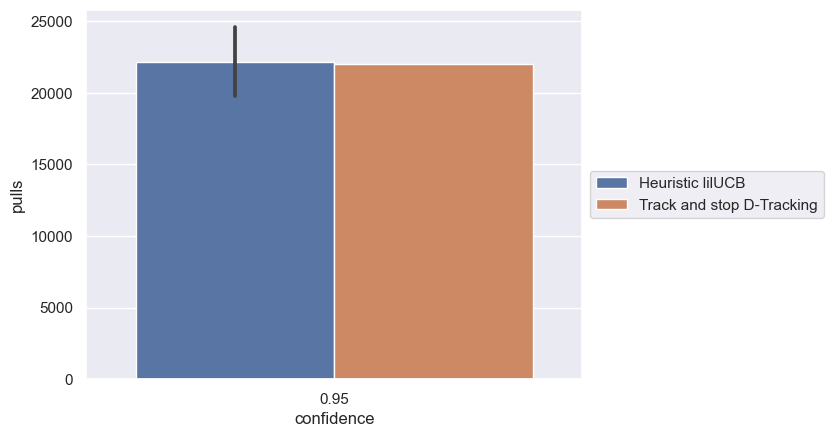

In [7]:
fig = plt.figure()
ax = plt.subplot(111)
sns.barplot(x='confidence', y='total_actions', hue='learner', data=trials_df)
plt.ylabel('pulls')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))